In [1]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant #회귀분석 상수항 추가
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor #예측/회귀
from sklearn.linear_model import LinearRegression #분산 팽창계수 계산할때 사용
from sklearn.feature_selection import RFE #후진제거법(변수선택)
from sklearn.preprocessing import StandardScaler #표준화 회귀계수 산출(scale 변환)
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공산성 확인
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import graphviz # 나무구조 시각화
from sklearn.tree import export_graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime

#로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# scaling
from sklearn.preprocessing import StandardScaler
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm

# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import pyreadr
import seaborn as sns
import multiprocessing as mp
from glob import glob
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
# 메트릭 라이브러리
from sklearn.metrics import accuracy_score, plot_roc_curve, precision_score, recall_score

# 한글을 지원하는 폰트로 변경
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우는 'Malgun Gothic'으로 변경 요망

# plot style을 ggplot으로 변경
plt.style.use('ggplot')

# 모든 것을 출력하는 옵션
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def make_line(df, tagname):
    df = df[(df['id'] == tagname) & (df['cause'] != '기타중지')]
    df = df.sort_values('datetime').reset_index()
    
    plt.figure(figsize=(10,8))
    sns.lineplot(x='index',y='value',hue='cause',data=df)

In [2]:
df_raw = pd.read_csv('오대오.csv')
#df_raw_3['datetime'] = pd.to_datetime(df_raw_3.datetime).dt.tz_localize(None)
#df_raw_3 = pd.pivot_table(df_raw_3, index ='datetime', columns = 'id', values ='value')
#df_raw_3.head()

In [6]:
df_raw = df_raw.drop('Unnamed: 0',axis=1)

In [7]:
df_raw

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,14.516590,3.727272,3.659474,64.386761,0.000000,10.879403,0.0,100.0,91.126781,43.569761,...,40.107615,39.866318,39.867307,39.242749,0.045077,0.338026,0.199523,0.003820,46.439539,0
1,14.438721,3.863102,3.823411,0.370337,0.000000,0.019885,0.0,100.0,92.520378,52.853971,...,40.061705,29.150599,0.000000,39.549413,0.060481,0.313373,0.098486,0.035789,94.234855,0
2,14.369410,3.819573,3.849695,122.368513,27.823089,0.096102,0.0,100.0,92.611488,51.192340,...,39.910447,40.206674,40.657971,40.766664,0.489483,0.178890,0.051197,0.035789,64.669526,0
3,14.080565,3.913643,3.882729,227.436914,0.000000,35.740705,0.0,100.0,90.915691,48.961057,...,33.887585,40.356547,39.592079,40.202029,0.264244,0.228764,0.009547,0.029205,48.615663,0
4,14.344228,3.676193,3.674700,76.245618,0.000000,12.329847,0.0,100.0,92.037182,48.874683,...,40.347095,40.627034,39.046095,39.954925,0.193447,0.410250,0.027081,0.087180,49.166320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109435,14.664333,3.582974,3.536546,67.188139,0.000000,0.000000,0.0,100.0,91.572893,49.440436,...,38.212043,35.510047,38.788630,40.738352,0.121573,0.195366,0.021214,0.097006,47.532919,1
109436,14.252853,3.924505,3.894912,165.684886,5.189121,0.000000,0.0,100.0,91.273919,49.740476,...,39.948361,41.142189,40.687020,39.954327,0.061273,0.201190,0.121320,0.077722,34.597847,1
109437,14.730582,3.548382,3.516528,27.604100,2.630102,0.000000,0.0,100.0,91.385959,50.079478,...,39.606370,40.273973,40.311136,36.640596,0.345311,0.277868,0.044777,0.000000,78.200642,1
109438,14.223682,3.595405,3.693201,210.320778,0.000000,37.981309,0.0,100.0,90.416878,51.816844,...,2.718306,40.355379,14.064412,40.099579,0.136705,0.257537,0.004777,0.041058,30.884150,1


In [8]:
# 모델 빌드전 결측치 최종 확인
df_raw.isna().sum()

TAG_001    0
TAG_002    0
TAG_004    0
TAG_005    0
TAG_006    0
          ..
TAG_190    0
TAG_191    0
TAG_192    0
TAG_193    0
cause      0
Length: 140, dtype: int64

# 모델링 - GB

In [9]:
# split data
train_data, test_data = train_test_split(df_raw, train_size = 0.6, random_state = 1234)
print(train_data.shape)
print(test_data.shape)

(65664, 140)
(43776, 140)


In [10]:
my_y = 'cause'
my_x = train_data.drop('cause', axis = 1).columns

In [13]:
gb_final = GradientBoostingClassifier( max_depth=5, n_estimators=100, learning_rate=0.1, 
                                      random_state=1234)
gb_final.fit(train_data[my_x],train_data[my_y])

# 예측
y_pred = gb_final.predict(test_data[my_x])

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(train_data[my_x],train_data[my_y])))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(test_data[my_x],test_data[my_y])))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(test_data[my_y], y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(test_data[my_y], y_pred, digits=3))

GradientBoostingClassifier(max_depth=5, random_state=1234)

Accuracy on training set: 0.989
Accuracy on test set: 0.985

Confusion matrix: 
[[21472   394]
 [  271 21639]]
              precision    recall  f1-score   support

           0      0.988     0.982     0.985     21866
           1      0.982     0.988     0.985     21910

    accuracy                          0.985     43776
   macro avg      0.985     0.985     0.985     43776
weighted avg      0.985     0.985     0.985     43776



In [14]:
from sklearn.metrics import confusion_matrix
print('confusion matrix :',confusion_matrix(test_data[my_y], y_pred))

confusion matrix : [[21472   394]
 [  271 21639]]


In [25]:
from sklearn.metrics import classification_report
print('classification :',classification_report(test_data[my_y], y_pred,digits=3))

classification :               precision    recall  f1-score   support

           0      0.988     0.982     0.985     21866
           1      0.982     0.988     0.985     21910

    accuracy                          0.985     43776
   macro avg      0.985     0.985     0.985     43776
weighted avg      0.985     0.985     0.985     43776



In [26]:
print('classification :',classification_report(test_data[my_y], y_pred,digits=5))

classification :               precision    recall  f1-score   support

           0    0.98754   0.98198   0.98475     21866
           1    0.98212   0.98763   0.98487     21910

    accuracy                        0.98481     43776
   macro avg    0.98483   0.98481   0.98481     43776
weighted avg    0.98482   0.98481   0.98481     43776



In [16]:
# 변수명
v_feature_name = train_data[my_x].columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
91,TAG_132,0.216
95,TAG_138,0.138
71,TAG_104,0.082
86,TAG_124,0.082
72,TAG_105,0.041
...,...,...
18,TAG_024,0.000
39,TAG_057,0.000
15,TAG_020,0.000
7,TAG_011,0.000


<BarContainer object of 139 artists>

([<matplotlib.axis.YTick at 0x7f77cfcd1d90>,
 [Text(0, 0, 'TAG_008'),
  Text(0, 1, 'TAG_024'),
  Text(0, 2, 'TAG_011'),
  Text(0, 3, 'TAG_020'),
  Text(0, 4, 'TAG_057'),
  Text(0, 5, 'TAG_022'),
  Text(0, 6, 'TAG_027'),
  Text(0, 7, 'TAG_158'),
  Text(0, 8, 'TAG_183'),
  Text(0, 9, 'TAG_162'),
  Text(0, 10, 'TAG_050'),
  Text(0, 11, 'TAG_188'),
  Text(0, 12, 'TAG_102'),
  Text(0, 13, 'TAG_181'),
  Text(0, 14, 'TAG_058'),
  Text(0, 15, 'TAG_130'),
  Text(0, 16, 'TAG_049'),
  Text(0, 17, 'TAG_089'),
  Text(0, 18, 'TAG_184'),
  Text(0, 19, 'TAG_018'),
  Text(0, 20, 'TAG_054'),
  Text(0, 21, 'TAG_021'),
  Text(0, 22, 'TAG_070'),
  Text(0, 23, 'TAG_066'),
  Text(0, 24, 'TAG_119'),
  Text(0, 25, 'TAG_115'),
  Text(0, 26, 'TAG_069'),
  Text(0, 27, 'TAG_122'),
  Text(0, 28, 'TAG_046'),
  Text(0, 29, 'TAG_103'),
  Text(0, 30, 'TAG_159'),
  Text(0, 31, 'TAG_182'),
  Text(0, 32, 'TAG_163'),
  Text(0, 33, 'TAG_087'),
  Text(0, 34, 'TAG_088'),
  Text(0, 35, 'TAG_068'),
  Text(0, 36, 'TAG_191'),
  T

Text(0.5, 0, '설명변수 중요도')

Text(0, 0.5, '설명변수')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


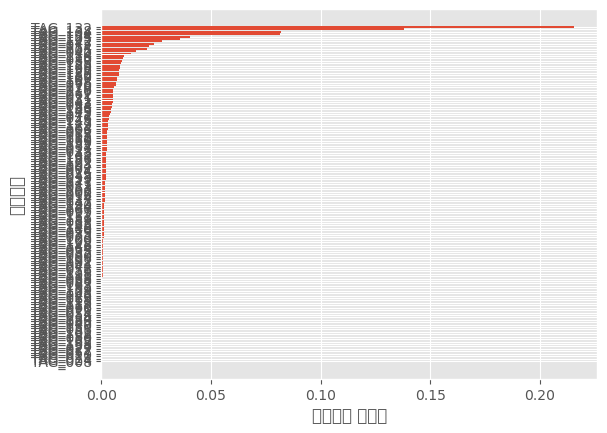

In [17]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")